In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import re
import seaborn as sns
import matplotlib.pyplot as plt
import emoji

from kagglehub import KaggleDatasetAdapter

from transformers import pipeline
from datasets import load_dataset
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [ ]:
file_path = "sentiment_test.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/tweeteval-a-multi-task-classification-benchmark",
  file_path,
)

print("First 5 records:", df.head())

/tmp/ipython-input-3132676398.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'tweeteval-a-multi-task-classification-benchmark' dataset.
First 5 records:                                                 text  label
0  @user @user what do these '1/2 naked pics' hav...      1
1  OH: “I had a blue penis while I was this” [pla...      1
2  @user @user That's coming, but I think the vic...      1
3  I think I may be finally in with the in crowd ...      2
4  @user Wow,first Hugo Chavez and now Fidel Cast...      0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12284 entries, 0 to 12283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12284 non-null  object
 1   label   12284 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 192.1+ KB


In [ ]:

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)


In [ ]:
def text_preprocessing(sentiment_df):
    # Create a new column for the processed text
    sentiment_df['processed_text'] = ''

    for index, row in sentiment_df.iterrows():
        text = row['text']
        if not isinstance(text, str):
            # If not a string, replace with empty string or default value
            print(text)
            text = ''
        else:
            text = text.lower()

        # Remove emoji
        text = remove_emoji(text)
        # Remove links
        text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', '', text)
        # Remove usernames
        text = re.sub(r'@[^\s]+', '', text)
        # Replace hashtags with just the word
        text = re.sub(r'#([^\s]+)', r'\1', text)
        # Fix multiple white spaces to a single space
        text = re.sub(r'[\s]+', ' ', text)
        # Remove words shorter than 4 characters and strip spaces
        text = re.sub(r'\W*\b\w{1,3}\b', '', text)
        text = text.strip()

        # Save the cleaned text in the DataFrame
        sentiment_df.at[index, 'processed_text'] = text


In [ ]:
# Df cleaning
text_preprocessing(df)

In [ ]:
df.head(50)

,text,label,processed_text
0,@user @user what do these '1/2 naked pics' hav...,1,what these naked pics' have with anything? the...
1,OH: “I had a blue penis while I was this” [pla...,1,blue penis while this” [playing with google ea...
2,"@user @user That's coming, but I think the vic...",1,that coming think victims going medicaid recip...
3,I think I may be finally in with the in crowd ...,2,think finally with crowd mannequinchallenge gr...
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",0,",first hugo chavez fidel castro. danny glover,..."
5,Savchenko now Saakashvili took drug test live ...,1,savchenko saakashvili took drug test live ukra...
6,How many more days until opening day? 😩,1,many more days until opening?
7,Twitter's #ThankYouObama Shows Heartfelt Grati...,2,twitter thankyouobama shows heartfelt gratitud...
8,All CSG and Fracking all around Australia is t...,1,fracking around australia cease mining entitie...
9,@user @user @user @user @user @user take away ...,0,take away illegals dead people trump wins popu...


In [ ]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT e

In [ ]:
label = sentiment_pipeline(['kiya tho refresh maarkefir comment karo', 'You\'re handsome'])
label

[{'label': 'neutral', 'score': 0.8653273582458496},
 {'label': 'positive', 'score': 0.9465565085411072}]

# Test on dataset

In [ ]:
df['mapped_labels'] = df['label'].replace({0: 'negative', 1: 'neutral', 2: 'positive'})

In [ ]:
df.isna().sum()

,0
text,0
label,0
processed_text,0
mapped_labels,0


In [ ]:
# Drop rows with missing values
df.dropna(subset=['text', 'label'], inplace=True)

In [ ]:
# Display some stats
print(df['label'].value_counts())

label
1    5937
0    3972
2    2375
Name: count, dtype: int64


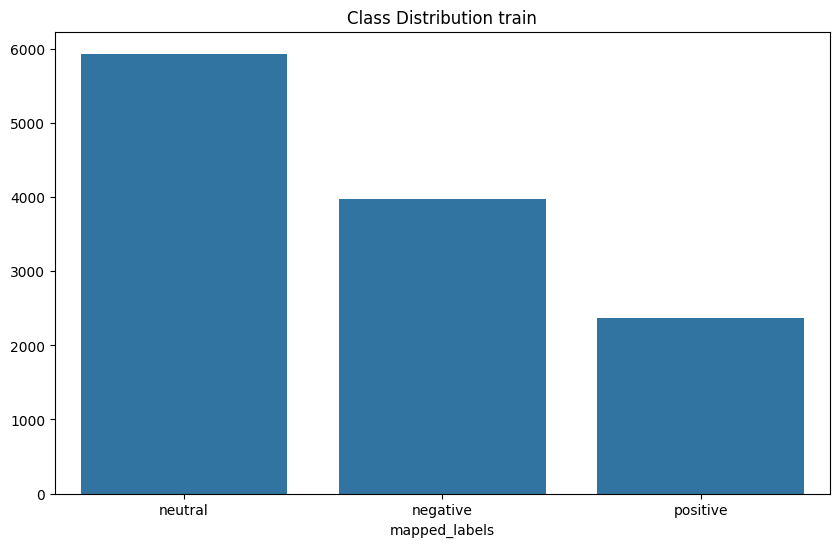

In [ ]:
dist = df['mapped_labels'].value_counts()
def distribution_plot(x, y, name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y)
    plt.title(name)
    plt.show()

distribution_plot(x=dist.index, y=dist.values, name='Class Distribution train')

In [ ]:
df.shape

(12284, 4)

In [ ]:
sample_text = df[:300]

In [ ]:
sample_text.shape

(300, 4)

In [ ]:
def get_sentiment(text):
  return(sentiment_pipeline(text)[0]['label'])

In [ ]:
#sample_text['RoBerta'] = df['processed_text'].apply(get_sentiment)

In [ ]:
def predict_sentiment_batch(df, text_column="processed_text", batch_size=32):
    results = []
    for i in tqdm(range(0, len(df), batch_size)):
        batch_texts = df[text_column].iloc[i:i+batch_size].tolist()
        preds = sentiment_pipeline(batch_texts)
        results.extend([p['label'] for p in preds])
    return results

# just for test, need to extend on all date
df["roberta_pred"] = predict_sentiment_batch(df)


100%|██████████| 384/384 [01:57<00:00,  3.26it/s]



📊 Report di classificazione:
              precision    recall  f1-score   support

    negative       0.68      0.71      0.70      3972
     neutral       0.68      0.73      0.70      5937
    positive       0.74      0.54      0.63      2375

    accuracy                           0.69     12284
   macro avg       0.70      0.66      0.68     12284
weighted avg       0.69      0.69      0.69     12284



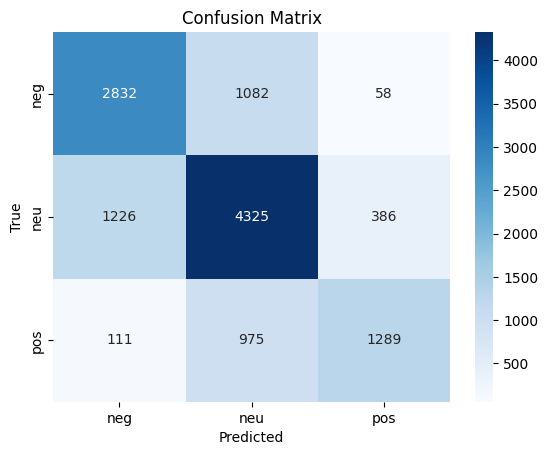

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n📊 Report di classificazione:")
print(classification_report(df["mapped_labels"], df["roberta_pred"], zero_division=0))

cm = confusion_matrix(df["mapped_labels"], df["roberta_pred"], labels=["negative", "neutral", "positive"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neg","neu","pos"], yticklabels=["neg","neu","pos"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
errors = df[df["label"] != df["roberta_pred"]]
print(errors.sample(5)[["processed_text", "mapped_labels", "roberta_pred"]])


                                          processed_text mapped_labels  \
983    jong doesn like being called fatty third’compa...       neutral   
3558   tech summary: bangladesh says uber 'illegal', ...       neutral   
4446   they have esperienced talent time freshman. gr...      positive   
2924   took this capital salt lake. fitting scripture...      negative   
11376  hell twdfamily official magazine followed like...       neutral   

      roberta_pred  
983       negative  
3558      negative  
4446       neutral  
2924       neutral  
11376     positive  
